In [153]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## Categorical Association

In [154]:
patients = Table.read_table('breast-cancer.csv').drop('ID')

In [155]:
shuffled = patients.sample(with_replacement=False) 
training = shuffled.take(np.arange(341))
test  = shuffled.take(np.arange(341, 683))

In [156]:
training

Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
1,1,2,2,2,1,3,1,1,0
10,10,8,6,4,5,8,10,1,1
8,6,5,4,3,10,6,1,1,1
5,1,4,1,2,1,3,2,1,0
10,4,4,6,2,10,2,3,1,1
8,2,1,1,5,1,1,1,1,0
5,2,2,2,2,1,2,2,1,0
5,1,1,6,3,1,1,1,1,0
3,4,5,2,6,8,4,1,1,1
10,10,8,10,6,5,10,3,1,1


In [157]:
training_uniformity = training_set.select('Class', 'Uniformity of Cell Size').relabel(1, 'Uniformity')
training_uniformity

Class,Uniformity
1,3
0,2
0,1
0,1
0,1
0,1
1,6
1,10
0,1
1,3


In [158]:
training_counts = training_uniformity.pivot('Class', 'Uniformity')
training_counts

Uniformity,0,1
1,177,2
2,17,5
3,16,17
4,4,15
5,0,13
6,0,17
7,1,10
8,1,13
9,1,4
10,0,28


In [159]:
def proportions(array):
    """Return an array of proportions."""
    return array/np.sum(array)

def compare(t):
    return t.select(0).with_columns(
        'Benign',    proportions(t.column(1)),
        'Malignant', proportions(t.column(2))    
    ).set_format([1, 2], PercentFormatter)

In [160]:
compare(training_counts)

Uniformity,Benign,Malignant
1,81.57%,1.61%
2,7.83%,4.03%
3,7.37%,13.71%
4,1.84%,12.10%
5,0.00%,10.48%
6,0.00%,13.71%
7,0.46%,8.06%
8,0.46%,10.48%
9,0.46%,3.23%
10,0.00%,22.58%


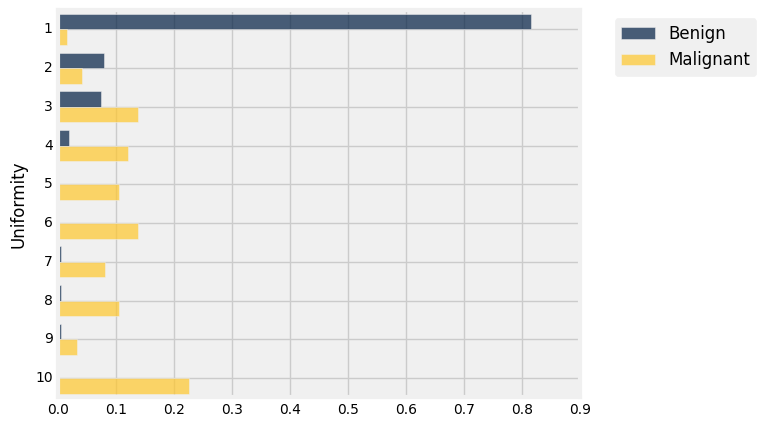

In [161]:
compare(training_counts).barh(0)

In [162]:
test_set.take(np.arange(4)).column('Uniformity of Cell Size') > 3

array([False, False,  True, False], dtype=bool)

In [164]:
classification = test_set.column('Uniformity of Cell Size') > 3

np.count_nonzero(classification == test_set.column('Class'))/test_set.num_rows

0.9502923976608187

In [168]:
False == 0

True

In [166]:
True == 1

True

In [169]:
classification = test_set.column('Uniformity of Cell Size') > 0

np.count_nonzero(classification == test_set.column('Class'))/test_set.num_rows

0.3362573099415205

In [170]:
classification = test_set.column('Uniformity of Cell Size') > 10

np.count_nonzero(classification == test_set.column('Class'))/test_set.num_rows

0.6637426900584795

## Comparing two samples

In [183]:
patients.show(3)

Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
5,1,1,1,2,1,3,1,1,0
5,4,4,5,7,10,3,2,1,0
3,1,1,1,2,2,3,1,1,0


In [186]:
mitoses = patients.select('Class', 'Mitoses')

In [187]:
counts = patients.pivot('Class', 'Mitoses')
counts

Mitoses,0,1
1,431,132
2,8,27
3,2,31
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [172]:
compare(counts)

Mitoses,Benign,Malignant
1,97.07%,55.23%
2,1.80%,11.30%
3,0.45%,12.97%
4,0.00%,5.02%
5,0.23%,2.09%
6,0.00%,1.26%
7,0.23%,3.35%
8,0.23%,2.93%
10,0.00%,5.86%


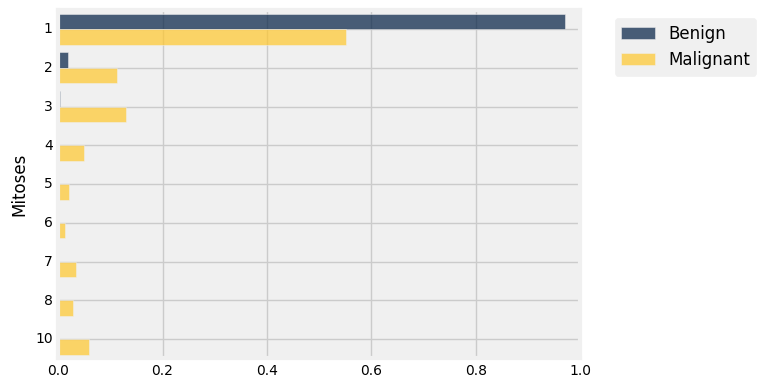

In [173]:
compare(counts).barh(0)

In [174]:
def total_variation_distance(distribution_1, distribution_2):
    """Each distribution is an array of proportions that sums to 1."""
    return np.abs(distribution_1 - distribution_2).sum()/2

def table_tvd(table, label_1, label_2):
    return total_variation_distance(table.column(label_1), table.column(label_2))

In [181]:
table_tvd(compare(counts), 1, 2)

0.41841946549059517

In [182]:
mitoses

Class,Mitoses
0,1
0,1
0,1
0,1
0,1
1,1
0,1
0,1
0,5
0,1


In [176]:
shuffled_mitoses = mitoses.sample(with_replacement=False).column(1) # Permuted

In [177]:
mitoses.select(0).with_column('Shuffled', shuffled_mitoses) # Paired class with permuted values

Class,Shuffled
0,8
0,1
0,1
0,1
0,1
1,1
0,1
0,5
0,1
0,1


In [178]:
shuffled_counts = mitoses.select(0).with_column('Shuffled', shuffled_mitoses).pivot(0, 1)
shuffled_counts

Shuffled,0,1
1,368,195
2,22,13
3,16,17
4,8,4
5,5,1
6,2,1
7,5,4
8,7,1
10,11,3


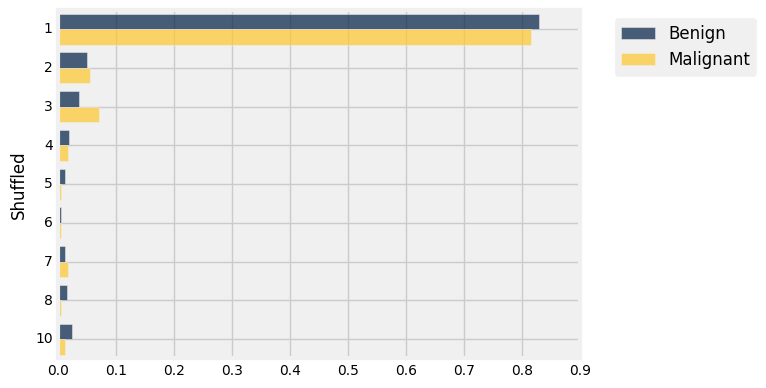

In [179]:
compare(shuffled_counts).barh(0)

In [188]:
table_tvd(compare(shuffled_counts), 1, 2)

0.045412567379094583

Observed TVD: 0.418419465491


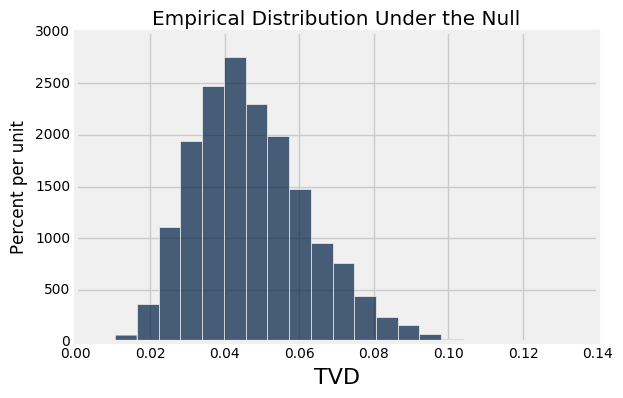

In [189]:
repetitions = 5000
tvds = []
for i in np.arange(repetitions):
    shuffled_mitoses = mitoses.sample(with_replacement=False).column(1)
    shuffled_counts = mitoses.select(0).with_column('Shuffled', shuffled_mitoses).pivot(0, 1)
    shuffled_tvd = table_tvd(compare(shuffled_counts), 1, 2)
    tvds.append(shuffled_tvd)

Table().with_column('TVD', tvds).hist(bins=20)
plots.title('Empirical Distribution Under the Null')
print('Observed TVD:', table_tvd(compare(counts), 1, 2))

## Deflategate

In [190]:
football = Table.read_table('football.csv')
football = football.drop('Team')
football.show()

Ball,Blakeman,Prioleau
Patriots 1,11.5,11.8
Patriots 2,10.85,11.2
Patriots 3,11.15,11.5
Patriots 4,10.7,11
Patriots 5,11.1,11.45
Patriots 6,11.6,11.95
Patriots 7,11.85,12.3
Patriots 8,11.1,11.55
Patriots 9,10.95,11.35
Patriots 10,10.5,10.9


In [191]:
football = football.with_column(
    'Combined', (football.column(1)+football.column(2))/2
    )
football.show()

Ball,Blakeman,Prioleau,Combined
Patriots 1,11.5,11.8,11.65
Patriots 2,10.85,11.2,11.025
Patriots 3,11.15,11.5,11.325
Patriots 4,10.7,11,10.85
Patriots 5,11.1,11.45,11.275
Patriots 6,11.6,11.95,11.775
Patriots 7,11.85,12.3,12.075
Patriots 8,11.1,11.55,11.325
Patriots 9,10.95,11.35,11.15
Patriots 10,10.5,10.9,10.7


In [192]:
patriots = football.where('Ball', are.containing('Patriots'))
patriots = patriots.with_column('Drop', 12.5-patriots.column('Combined'))
patriots.show()

Ball,Blakeman,Prioleau,Combined,Drop
Patriots 1,11.5,11.8,11.65,0.85
Patriots 2,10.85,11.2,11.025,1.475
Patriots 3,11.15,11.5,11.325,1.175
Patriots 4,10.7,11,10.85,1.65
Patriots 5,11.1,11.45,11.275,1.225
Patriots 6,11.6,11.95,11.775,0.725
Patriots 7,11.85,12.3,12.075,0.425
Patriots 8,11.1,11.55,11.325,1.175
Patriots 9,10.95,11.35,11.15,1.35
Patriots 10,10.5,10.9,10.7,1.8


In [193]:
colts = football.where('Ball', are.containing('Colts'))
colts = colts.with_column('Drop', 13.0-colts.column('Combined'))
colts

Ball,Blakeman,Prioleau,Combined,Drop
Colts 1,12.7,12.35,12.525,0.475
Colts 2,12.75,12.3,12.525,0.475
Colts 3,12.5,12.95,12.725,0.275
Colts 4,12.55,12.15,12.35,0.65


In [194]:
patriots_mean = patriots.column('Drop').mean()
colts_mean = colts.column('Drop').mean()

observed_statistic = patriots_mean - colts_mean
observed_statistic

0.73352272727272805

In [195]:
drops = Table().with_column(
    'Drop', np.append(patriots.column('Drop'), colts.column('Drop'))
)
drops.show()

Drop
0.85
1.475
1.175
1.65
1.225
0.725
0.425
1.175
1.35
1.8


In [196]:
drops.sample(with_replacement=False).show()

Drop
0.425
0.475
1.475
0.475
1.35
0.85
1.225
0.725
1.175
1.8


Observed Statistic: 0.733522727273
Empirical P: 0.0023


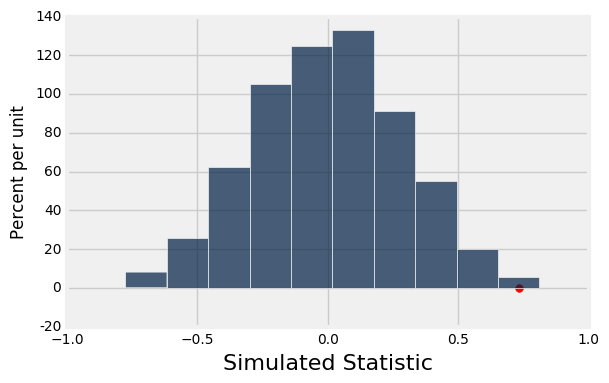

In [197]:
simulated_statistics = []
repetitions = 10000

for i in np.arange(repetitions):
    shuffled = drops.sample(with_replacement=False)
    new_patriots_mean = shuffled.take(np.arange(11)).column(0).mean()
    new_colts_mean = shuffled.take(np.arange(11, drops.num_rows)).column(0).mean()
    new_statistic = new_patriots_mean - new_colts_mean
    simulated_statistics.append(new_statistic)
    
empirical_P = np.count_nonzero(simulated_statistics >= observed_statistic)/repetitions
empirical_P

print('Observed Statistic:', observed_statistic)
print('Empirical P:', empirical_P)
results = Table().with_column('Simulated Statistic', simulated_statistics)
results.hist()
plots.scatter(observed_statistic, 0, color='red', s=30);